In [1]:
# A python library that allows to work with multidimensional arrays and mathematical functions.
import numpy as np
# A python library that is widely used for reading, processing and analyzind data.
import pandas as pd
# They imported the pickle and csv files to work with.
import pickle, csv
# It used to interact with the operating system, and its path. 
import os

# Keras is a high-level API used to build deep learning models. Keras enables model creation with sequential and functional APIs.
from keras.models import Sequential, load_model, Model
# These are the layers of the model. LSTM is a type of reccurent neural network. 
# Dense is a fully connected layer. Others are different types of neural network layers.
from keras.layers import LSTM, Dense, Dropout, Input, concatenate, Flatten, Reshape,MaxPooling2D, Conv2D, TimeDistributed
# This following import uses to reduce overfitting problems by limiting weights.
from keras import regularizers

# ModelCheckPoint records the model's weights at regular intervals during training. 
# EarlyStopping stops training if a specific metric does not improve over a specified period of time. 
from keras.callbacks import ModelCheckpoint, EarlyStopping
# These are loss functions and optimization algorithms. 
# MeanSquaredError provides the mean square error measurement.
# RootMeanSquared Error measures the root mean square error.
# Adam is a widely used gradient descent optimization algorithm.
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
# Importing the resize function from the transform module of the skimage library.
# This function is used to change the image size.
from skimage.transform import resize
# Importing the layers and models modules from TensorFlow's Keras API.
# These modules are used to create a deep learning model. 
# The models module is used to create and manage models.
from tensorflow.keras import layers, models

# Importing pyplot module from the matplotlib library.
# This module is used to perform data visualization. 
# With abbreviation 'plt' this module can be accessable. 
from matplotlib import pyplot as plt
# Importing the style module from the matplotlib library. 
# This module is used to determine the style of graphics and drawings.
from matplotlib import style
# Importing StandardScaler and MinMaxScaler classes of the preprocessing module from the sklearn library.
# These classes are used to scale and standardize data properties.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Importing the train_test_split function of the model_selection module from the sklearn library.
# This function is used to separate the data set into training and testing sets.
from sklearn.model_selection import train_test_split
#  Seaborn is a Python library used for data visualization. 
# Similar to Matplotlib, it is used to create more effective and attractive visualizations.
import seaborn as sns

# Backend module is used to control TensorFlow's Keras backend. 
# The current Keras session with K.clear_session() is cleaned.
import tensorflow.keras.backend as K
K.clear_session()

ModuleNotFoundError: No module named 'keras'

In [ ]:
# This block of code in the following reads data from a file named 'PowerPrice.csv', 
# edits the datetime column, and creates a data frame as a result.
# Such operations are performed during the data preprocessing stage and
# ensure that the data set is ready for analysis.

In [ ]:
# Read a CSV file named and assign this data to a Pandas data frame (DateFrame).
# The name of the data frame is df_powerprice.
df_powerprice = pd.read_csv("data/PowerPrice.csv")
# convert the 'Time' column into datatime objects. The data type of the column is converted to date-time
# format with the pd.to_datetime function.
# infer_datetime_format = True parameter allows the date format to be determined automatically.
df_powerprice["Time"] = pd.to_datetime(df_powerprice["Time"], infer_datetime_format=True)
# In the following row, 'Time' column is removed from the data frame. 
# This column will no longer be present in the dataframe.
df_powerprice = df_powerprice.drop(columns=["Time"])
# Print the data frame obtained as a result of the above rows to the screen.
df_powerprice

In [ ]:
# This bloc of the code processes files with the '.pickle' extebsion in the 'data/Spatial' directory and adds them 
# to the list of datasets with a certain shape. It prints the names of files whose shapes do not match and 
# the expected shape to the screen. This process is done to examine the existing files and select the appropriate ones.#

In [2]:
# Creating an empty list datasets. 
# This list will be used to store processed datasets.
datasets = []
# Starting a loop to process the files in the 'data/Spatial' directory.
# os.listdir() function returns a list of files located in the specified directory.
for filename in os.listdir("data/Spatial"):
    # If statement checks the file is '.pickle', then process will be started.
    # The .endswith() method checks whether the last characters in a string match the specified pattern.
    if filename.endswith(".pickle"):
        # Starting the file reading process.
        # The file is opened in 'rb' mode (binary reading).
        with open(os.path.join("data/Spatial", filename), "rb") as file:
            # The data in the file is loaded using the pickle module. It is loaded data stored in pickle format.
            data = pickle.load(file)
            # This following code add the data to the datasets list.
            if data.shape == (100, 35040):
                datasets.append(data)
                print(filename)
            else:
                print(f"Skipping {filename}: unexpected shape {data.shape}")

In [3]:
# This block of the code combines the arrays in the datasets list, resizes and reshapes them. 
# As a result, there will be a three-dimensional array called spatial_data. These operations
# help to bring the dataset into the correct format.

In [7]:
# A three-dimensional array is created by combining the array in the datasets list.
# This process is done using the np.stack() function. 
# The axis=0 specifies that the merge is performed on the first axis or row.
spatial_data = np.stack(datasets, axis=0)
# The shape of the created three dimensional array is determined again. This line uses the reshape() function.
spatial_data = spatial_data.reshape((spatial_data.shape[0], spatial_data.shape[1], spatial_data.shape[2]))

# TBy transposing the second and third dimensions of the array, an array whose shape is obtained here.
spatial_data = spatial_data.transpose((0, 1, 2))

spatial_data.shape

(13, 100, 35040)

In [8]:
# The file of 'germany/mask.csv' is read and coonvert this data into a a pandas data frame and 
# transfer it to the mask variable. The header = None means that the file has no column headers.
# Finally dataframe just converted to a NumPy array with values.
mask = pd.read_csv("germany/mask.csv", header=None).values
#mask = mask_df.values.reshape((40, 40, 1))

mask.shape

(30, 30)

In [9]:
spatial_data.shape

(13, 100, 35040)

In [10]:
# This code block filters the data from the spatial_data array with a mask and
# places it into a four-dimensional array named image_all.

In [11]:
# Creatind a four-dimensional zero array named imagine_all. Its shape is determined as in the code.
# The shape meanings that 35040 time steps, 13 different images of 30x30 pixls each will be stored.
image_all = np.zeros((35040, 30, 30, 13))
# The outer loop refers to the third dimensions of the spatial_array. This represents time steps.
for j in range(spatial_data.shape[2]):
    # The inner loop refers to the fiirst dimension of the spatial_data array. 
    # This represents different features or channels.
    for i in range(spatial_data.shape[0]):
        # The following code represents of one image for each time step and feature channel.
        image = np.zeros((30, 30))
        # This following second innet loop represents the second dimension of the spatial_data array.
        # This represents indices of different features or channels.
        for s in range(spatial_data.shape[1]):
            # At each loop step, when the mask is equal to s, the relevant value is taken from
            # the spatial_data array and sent to the image array.
            image[mask == s] = spatial_data[i, s, j]
        # The image array is called to the created four-dimensional image_all array.
        # j as time step, i as a feature index and covers all pixel values.
        image_all[j, :, :, i] = image

In [12]:
# This block of code visualites the image present at a specific time step and in a specific feature.
# It also adds the color gamut and overlays a scale bar over the image. It makes the image easier to
# understand and interpret.

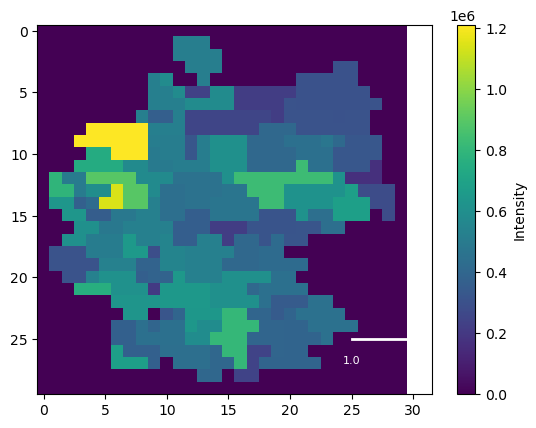

In [16]:
# Visualiying the image located in a specific feature or channel which is here 4.
# The imshow() funciton draws an image on the screen.
plt.imshow(image_all[35030, :, :, 4])
# The color scale indicates which feature of the image it represents.
plt.colorbar(label='Intensity')

scale_value = 1.0  # Specify the value for the scale bar
scale_bar_length = 5  # Specify the length of the scale bar in pixels

plt.plot([25, 25 + scale_bar_length], [25, 25], color='white', linewidth=2)
plt.text(25, 27, f'{scale_value}', color='white', ha='center', fontsize=8)

plt.show()

In [68]:
image_all.shape

(35040, 30, 30, 13)

In [ ]:
# The following code creates an array by taking the values from the 'Spot' column of the df_powerprice dataset.
# This array then normalized using MinMaxScaler and the normalized array is dumped to the output variable.

In [23]:
output = df_powerprice["Spot"].values

scaler = MinMaxScaler()
output = scaler.fit_transform(output.reshape(-1, 1))

output

array([[0.34239157],
       [0.34917003],
       [0.33597819],
       ...,
       [0.32760551],
       [0.33695176],
       [0.33731685]])

In [2]:
# The following code defines a Python function that is called split_datesets and takes four parameters:
# df, df2, window_size and look_ahead.

In [24]:
def split_datasets(df, df2, window_size, look_ahead):
    X = []
    y = []
    for i in range(len(df) - window_size - look_ahead + 1):
        # Selecting the slice from the df dataset, starting from the ith index and ending with the i + window_sizeth index.
        # This creates a subarray in the dataset X.
        row = df[i:i+window_size, :, :, :]
        # appending this subarray to the X array.
        X.append(row)
        # labes and saves the values corresponding to the index i + window_size + look_ahead - 1 from the df2 dataset as label.
        label = df2[i+window_size+look_ahead-1]
        # Adding those labels value to the y array.
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
# The code processes the dataset using the split_datasets function. 
# First, the window_size and look_ahead parameters are set, and then the split_datasets function
# is called with these parameters.

In [25]:
window_size = 4
look_ahead = 1
X, y = split_datasets(image_all, output, window_size=window_size, look_ahead=look_ahead)

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (35036, 4, 30, 30, 13), y shape: (35036, 1)


In [26]:
# The input_2d array creates a 2D array by combining the other axes, keeping the last axis of the X array fixed.
# This is because the normalizer has accepted 2D input,
input_2d = X.reshape(-1, X.shape[-1])

# In this line, a minmaxscaler normlizer is created.
scaler = MinMaxScaler()
# input_2d is normalized.
input_scaled = scaler.fit_transform(input_2d)

# Here the normalized input_scaled array revert back to the shape of the original dataset X.
# This returns the normalized data back to its original dimensions and into a format the model can process.
X = input_scaled.reshape(X.shape)

print("Scaled X shape:", X.shape)

Scaled X shape: (35036, 4, 30, 30, 13)


In [ ]:
# The code quite below divides the X and y datasets into training, validation and test sets. 
# It also prints the dimensions of each set on the screen.

In [27]:
# In the first line, X and y datasets are split into trainin (X_train and y_test) and testing (X_test and y_test) 
# sets using the train_test_split function. The parameter test_size = 0.3 specifies that 30 percent of the data
# will be allocated to the test set. The random_state = 30 parameter is an initial value used for random 
# shuffling of the data set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
# In the second line, the parameter test_size = 0.3 determines the size of the validation set.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=30)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17167, 4, 30, 30, 13)
y_train shape: (17167, 1)
X_val shape: (7358, 4, 30, 30, 13)
y_val shape: (7358, 1)
X_test shape: (10511, 4, 30, 30, 13)
y_test shape: (10511, 1)


In [41]:
time_steps = 4 # specifying the number of time stepes
width = 30 # width of the mask
height = 30 # height of the mask
channel = 13 # number of channels.

# The inout layer is just created. The input function specifies the shape of the input data.
# In this case, the input data will be 5D tensors.
input_layer = Input(shape=(time_steps, width, height, channel))

# The first convolution layer is created. 32 filters are used in this layer, each one is 3x3 in size.
# ReLU (Rectified Linear Unit) is used as the activation function.
cnn1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')
# The first pooling layer is created. In the following layer, maximum pooling is applied, reducing each region to
# 2x2 size.
cnn2 = MaxPooling2D(pool_size=(2, 2))
# The second convolution layer is created. 64 filters are used, each one is 3x3 in size. 
# ReLU is used as the activation function.
cnn3 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')
# The secon pooling layer is created.
# Macimum pooling is also applied here.
cnn4 = MaxPooling2D(pool_size=(2, 2))

# In these  steps, the TimeDistributed operation ensures that a convolution
# or pooling layer is applied identically to each time slice. td_cnn1 is a generated time distributed
# convolution layer. This layer applies the same concolution process to each time periof of the input data.
td_cnn1 = TimeDistributed(cnn1)(input_layer)
td_cnn2 = TimeDistributed(cnn2)(td_cnn1)
td_cnn3 = TimeDistributed(cnn3)(td_cnn2)
td_cnn4 = TimeDistributed(cnn4)(td_cnn3)

# Reshape of the output data. With that process, a data size of 4x4x64 is converted into a 1D array.
reshaped = Reshape((-1, 4*4*64))(td_cnn4)

# A time-distributed dense layer is also created. There are 10 neurons in this layer and ReLU is used as
# the activation layer.
td_fcnn = TimeDistributed(Dense(10, activation='relu', name='output'))(reshaped)

# an LSTM layer is created. There is 1 neuron in this layer. 
lstm_output = LSTM(1, name='lstm1_1')(td_fcnn)

# In the following step, a model is created by bringing all these layers together. 
# input_layer is used as input, and lstm_outpu is used as output.
model = Model(inputs=input_layer, outputs=lstm_output)

# A summary of the model is printed. This summary shows the model's layer, output shape
# and total number of parameters.
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 30, 30, 13)]   0         
                                                                 
 time_distributed_5 (TimeDis  (None, 4, 28, 28, 32)    3776      
 tributed)                                                       
                                                                 
 time_distributed_6 (TimeDis  (None, 4, 14, 14, 32)    0         
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 4, 12, 12, 64)    18496     
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, 4, 6, 6, 64)      0         
 tributed)                                                 

In [42]:
# Zhe model is being compiled. MSE is used as the optimization algorithm and the learning rate is set as 0.0001.
# Additionally RMSE is used as a metric.

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [43]:
# EarlyStopping callback is created to enable early stopping during the trainin process.
# This recall monitors changes in validation loass and stops training if there is no improvement
# for a certain patience period. 
# The restore_best_weights = true parameters ensures that the best weights are stored.
es = EarlyStopping(monitor='val_loss', patience=7, verbose=1, restore_best_weights=True)

In [44]:
# A ModelCheckpoint callback to record the weights at which the model performs best during training. 
# This callback will save the best model with the specified file path and name.
cp = ModelCheckpoint(filepath="training/model-website/model7.h5", 
                      save_best_only=True,
                      monitor='val_loss', 
                      mode='min', 
                      save_weights_only=False, 
                      verbose=1)

In [45]:
# The line is basicly the model training is done with X_train and y_train.
# The batch_size = 30 parameter specifies the sizw of the data batch to be used in each training step.
# The epochs = 1000 parameter specifies how many epochs will be trained in total.
# The validation_data = (X_val, y_val) parameter enables the validation set to be used.
history = model.fit(X_train, y_train, batch_size=30, epochs=1000, validation_data=(X_val, y_val), callbacks=[cp, es])

Epoch 1/1000
573/573 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0550
Epoch 1: val_loss improved from inf to 0.00040, saving model to training/model-website\model7.h5
573/573 [==============================] - 13s 20ms/step - loss: 0.0030 - root_mean_squared_error: 0.0550 - val_loss: 3.9754e-04 - val_root_mean_squared_error: 0.0199
Epoch 2/1000
570/573 [============================>.] - ETA: 0s - loss: 3.7650e-04 - root_mean_squared_error: 0.0194
Epoch 2: val_loss improved from 0.00040 to 0.00034, saving model to training/model-website\model7.h5
573/573 [==============================] - 11s 19ms/step - loss: 3.7631e-04 - root_mean_squared_error: 0.0194 - val_loss: 3.4227e-04 - val_root_mean_squared_error: 0.0185
Epoch 3/1000
570/573 [============================>.] - ETA: 0s - loss: 3.3734e-04 - root_mean_squared_error: 0.0184
Epoch 3: val_loss improved from 0.00034 to 0.00031, saving model to training/model-website\model7.h5
573/573 [=======

Epoch 23/1000
572/573 [============================>.] - ETA: 0s - loss: 2.2069e-04 - root_mean_squared_error: 0.0149
Epoch 23: val_loss did not improve from 0.00021
573/573 [==============================] - 10s 18ms/step - loss: 2.2063e-04 - root_mean_squared_error: 0.0149 - val_loss: 2.1875e-04 - val_root_mean_squared_error: 0.0148
Epoch 24/1000
570/573 [============================>.] - ETA: 0s - loss: 2.2046e-04 - root_mean_squared_error: 0.0148
Epoch 24: val_loss did not improve from 0.00021
573/573 [==============================] - 10s 18ms/step - loss: 2.2032e-04 - root_mean_squared_error: 0.0148 - val_loss: 2.1725e-04 - val_root_mean_squared_error: 0.0147
Epoch 25/1000
570/573 [============================>.] - ETA: 0s - loss: 2.1816e-04 - root_mean_squared_error: 0.0148
Epoch 25: val_loss improved from 0.00021 to 0.00021, saving model to training/model-website\model7.h5
573/573 [==============================] - 11s 19ms/step - loss: 2.1766e-04 - root_mean_squared_error: 0.0

570/573 [============================>.] - ETA: 0s - loss: 1.7362e-04 - root_mean_squared_error: 0.0132
Epoch 46: val_loss improved from 0.00016 to 0.00016, saving model to training/model-website\model7.h5
573/573 [==============================] - 11s 19ms/step - loss: 1.7343e-04 - root_mean_squared_error: 0.0132 - val_loss: 1.6243e-04 - val_root_mean_squared_error: 0.0127
Epoch 47/1000
570/573 [============================>.] - ETA: 0s - loss: 1.7059e-04 - root_mean_squared_error: 0.0131
Epoch 47: val_loss improved from 0.00016 to 0.00016, saving model to training/model-website\model7.h5
573/573 [==============================] - 11s 19ms/step - loss: 1.7034e-04 - root_mean_squared_error: 0.0131 - val_loss: 1.6122e-04 - val_root_mean_squared_error: 0.0127
Epoch 48/1000
572/573 [============================>.] - ETA: 0s - loss: 1.6619e-04 - root_mean_squared_error: 0.0129
Epoch 48: val_loss did not improve from 0.00016
573/573 [==============================] - 10s 18ms/step - loss: 1

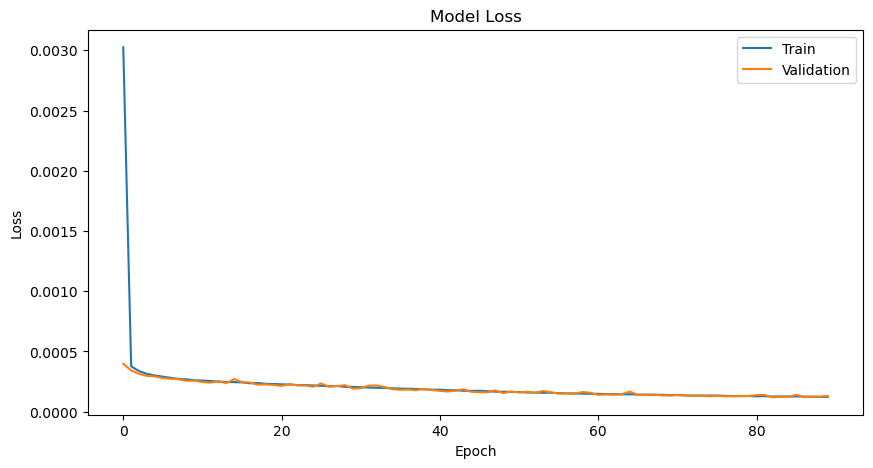

In [46]:
#Plot the training and validation loss

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

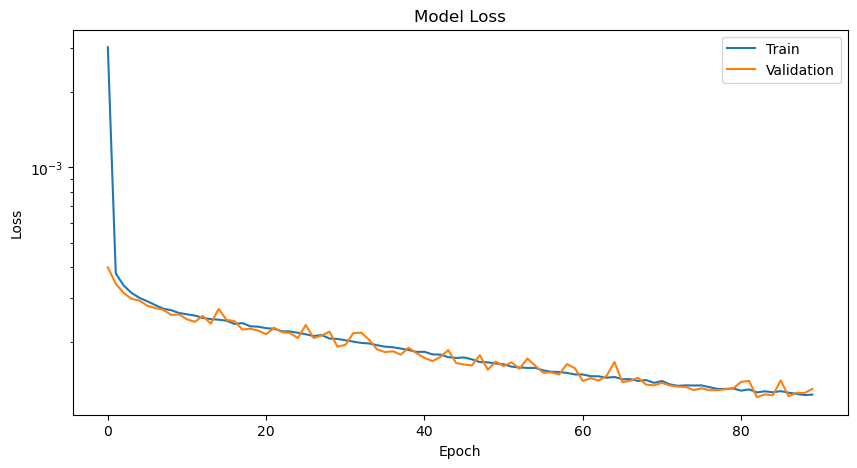

In [47]:
# Plot the training and validation loss on a logarithmic scale
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


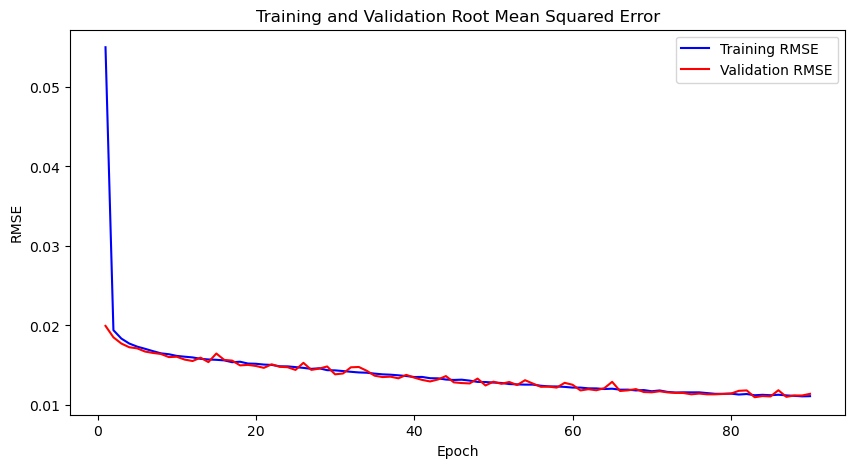

In [48]:
# Get the training and validation accuracy values from the history object
train_acc = history.history['root_mean_squared_error']
val_acc = history.history['val_root_mean_squared_error']

# Create a plot of training and validation accuracy
epochs = range(1, len(train_acc) + 1)
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc, 'b', label='Training RMSE')
plt.plot(epochs, val_acc, 'r', label='Validation RMSE')
plt.title('Training and Validation Root Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [49]:
# After training, print actual and predicted values for the validation data
y_val_pred = model.predict(X_val)
print("Actual\t\tPredicted")
for i in range(len(y_val)):
    print(f"{y_val[i]}\t{y_val_pred[i]}")

230/230 [==============================] - 2s 6ms/step
Actual		Predicted
[0.37556589]	[0.3491605]
[0.34940126]	[0.34312272]
[0.35030181]	[0.34114957]
[0.3384973]	[0.34546164]
[0.35782262]	[0.3525301]
[0.35686122]	[0.35227352]
[0.32461179]	[0.33023706]
[0.34313391]	[0.33700803]
[0.35693424]	[0.36233592]
[0.33539405]	[0.3402061]
[0.35787129]	[0.34679183]
[0.33328871]	[0.3299592]
[0.3502653]	[0.3380707]
[0.33990897]	[0.34812218]
[0.3887699]	[0.37862992]
[0.34054179]	[0.34212777]
[0.34027406]	[0.34418374]
[0.37661247]	[0.37739876]
[0.35770092]	[0.35763276]
[0.33485859]	[0.348059]
[0.31633646]	[0.30077383]
[0.32003602]	[0.32139447]
[0.27756413]	[0.30201653]
[0.33880154]	[0.33771187]
[0.36316507]	[0.3611771]
[0.35028964]	[0.35079914]
[0.31070194]	[0.30029213]
[0.33510198]	[0.3432905]
[0.33740203]	[0.3299193]
[0.36053644]	[0.35606048]
[0.37192718]	[0.35570872]
[0.31836879]	[0.3300384]
[0.3329723]	[0.3390336]
[0.34963248]	[0.33958787]
[0.34150319]	[0.34990683]
[0.34171007]	[0.34456766]
[0.3200

[0.36870223]	[0.37130314]
[0.36720537]	[0.36216518]
[0.34365721]	[0.34626403]
[0.36019569]	[0.35610172]
[0.32971085]	[0.33104077]
[0.38874556]	[0.36937204]
[0.31845397]	[0.3238864]
[0.34565302]	[0.34638894]
[0.35008275]	[0.34728652]
[0.39071703]	[0.38782772]
[0.50525727]	[0.5349742]
[0.35839459]	[0.3563246]
[0.30590712]	[0.32265797]
[0.36446722]	[0.35458967]
[0.31417028]	[0.32611313]
[0.33659884]	[0.3414389]
[0.35653264]	[0.35953122]
[0.31657986]	[0.33482325]
[0.33191355]	[0.32703352]
[0.28151925]	[0.2752081]
[0.35552256]	[0.34796122]
[0.30487271]	[0.3232794]
[0.33599036]	[0.3358162]
[0.33706129]	[0.33291608]
[0.34429003]	[0.35301626]
[0.30941197]	[0.29756126]
[0.34655357]	[0.34449473]
[0.34340165]	[0.33893427]
[0.33874069]	[0.34099928]
[0.33383634]	[0.32688344]
[0.32912671]	[0.34925658]
[0.31154164]	[0.3456236]
[0.33131724]	[0.32756314]
[0.34380324]	[0.34393287]
[0.34724724]	[0.34603414]
[0.35033831]	[0.34134132]
[0.31296549]	[0.32384488]
[0.36202113]	[0.38091272]
[0.35448815]	[0.3532

[0.35286959]	[0.34618992]
[0.35003407]	[0.34923968]
[0.35880835]	[0.35360008]
[0.36603709]	[0.36785743]
[0.33738987]	[0.33341277]
[0.38381687]	[0.37721768]
[0.35153094]	[0.34101194]
[0.35044784]	[0.34915748]
[0.34673611]	[0.35205656]
[0.35883269]	[0.35908484]
[0.35515747]	[0.3509683]
[0.34688215]	[0.33271858]
[0.35841893]	[0.3566462]
[0.3548654]	[0.3531583]
[0.33885022]	[0.3441611]
[0.34330429]	[0.3392507]
[0.33738987]	[0.34969795]
[0.34749063]	[0.35619137]
[0.36057294]	[0.35742018]
[0.33156063]	[0.3300131]
[0.35475588]	[0.34330365]
[0.30287689]	[0.30511945]
[0.34595726]	[0.3471945]
[0.33341041]	[0.34292015]
[0.33701261]	[0.33755416]
[0.34882928]	[0.35158184]
[0.23775739]	[0.26189673]
[0.28251716]	[0.29894373]
[0.36220367]	[0.3591746]
[0.34174658]	[0.3441625]
[0.34172224]	[0.34500322]
[0.32246994]	[0.33766228]
[0.35369712]	[0.3531111]
[0.32614516]	[0.3240864]
[0.32491603]	[0.32621494]
[0.28105681]	[0.30229136]
[0.34393711]	[0.34218407]
[0.37513995]	[0.36685944]
[0.33083045]	[0.33216202

[0.36793555]	[0.3740722]
[0.34195346]	[0.347064]
[0.33448133]	[0.33034617]
[0.33264372]	[0.32908413]
[0.33508981]	[0.34073535]
[0.3188434]	[0.33968428]
[0.34558]	[0.34828472]
[0.3643942]	[0.35815397]
[0.36652388]	[0.36967596]
[0.33717081]	[0.3448493]
[0.33322786]	[0.33960176]
[0.35900307]	[0.3634424]
[0.33495595]	[0.33462366]
[0.33687874]	[0.32612]
[0.35350241]	[0.35367715]
[0.37080757]	[0.37303784]
[0.36049993]	[0.35545936]
[0.34366938]	[0.3441006]
[0.31928151]	[0.33875838]
[0.36960278]	[0.3660849]
[0.35211508]	[0.35069525]
[0.31951273]	[0.32688048]
[0.3502653]	[0.35193825]
[0.32871294]	[0.33264932]
[0.29798471]	[0.30166984]
[0.35849194]	[0.36815345]
[0.3386555]	[0.34404776]
[0.35440296]	[0.3462796]
[0.36342063]	[0.3608251]
[0.22243587]	[0.28471476]
[0.35080076]	[0.36215252]
[0.35069123]	[0.34670928]
[0.32043762]	[0.33495504]
[0.33661101]	[0.34402847]
[0.35321034]	[0.36020148]
[0.33631894]	[0.3354022]
[0.35030181]	[0.3287126]
[0.33704912]	[0.33723155]
[0.32249428]	[0.33634058]
[0.3258

[0.3489023]	[0.3443163]
[0.33360512]	[0.34494868]
[0.335893]	[0.3315032]
[0.35661783]	[0.35346422]
[0.33036801]	[0.33676994]
[0.32854257]	[0.33023828]
[0.33479774]	[0.34932858]
[0.32933359]	[0.33686075]
[0.3423794]	[0.3467094]
[0.36222801]	[0.3819342]
[0.32397897]	[0.33319342]
[0.37494524]	[0.3647103]
[0.35452466]	[0.34691954]
[0.33658667]	[0.32725433]
[0.3652339]	[0.3629709]
[0.34147885]	[0.34149662]
[0.32722825]	[0.3303744]
[0.31713966]	[0.3264086]
[0.34863457]	[0.3438523]
[0.35394052]	[0.35976192]
[0.35094679]	[0.34474546]
[0.34426569]	[0.3517572]
[0.34408314]	[0.34804517]
[0.33645281]	[0.34185055]
[0.34581123]	[0.32578737]
[0.37847442]	[0.36620316]
[0.34492284]	[0.34994105]
[0.33198656]	[0.35583606]
[0.34749063]	[0.34440312]
[0.33047753]	[0.33054197]
[0.33751156]	[0.3342128]
[0.34938909]	[0.34816903]
[0.35658132]	[0.3674917]
[0.33900842]	[0.33866465]
[0.3364163]	[0.33502048]
[0.33676922]	[0.3443025]
[0.36030521]	[0.3627588]
[0.34553132]	[0.35159343]
[0.33541839]	[0.33946967]
[0.352

[0.34643187]	[0.35837182]
[0.33330088]	[0.3296877]
[0.34290269]	[0.3425413]
[0.33359295]	[0.32887194]
[0.34891447]	[0.34244516]
[0.32171543]	[0.33876148]
[0.35099547]	[0.36222845]
[0.38565448]	[0.37218308]
[0.39685051]	[0.39113173]
[0.36129095]	[0.364851]
[0.36456457]	[0.3618348]
[0.3203646]	[0.3201472]
[0.34871976]	[0.3462917]
[0.34236723]	[0.35172668]
[0.34463077]	[0.3416768]
[0.30911989]	[0.30289802]
[0.3472229]	[0.35247743]
[0.37275471]	[0.36533996]
[0.35251667]	[0.3554621]
[0.33982378]	[0.3408067]
[0.36103539]	[0.35764125]
[0.34993672]	[0.35919774]
[0.29338461]	[0.28028187]
[0.34755148]	[0.3439776]
[0.34264713]	[0.3480423]
[0.34515407]	[0.34504122]
[0.34369372]	[0.32275817]
[0.33168232]	[0.33504245]
[0.36395609]	[0.36376613]
[0.31958575]	[0.31212714]
[0.35755488]	[0.36559173]
[0.34526359]	[0.3389213]
[0.32184929]	[0.32233903]
[0.37874215]	[0.39313307]
[0.3540257]	[0.3617798]
[0.3276907]	[0.33297604]
[0.34004284]	[0.33774993]
[0.35263837]	[0.3377464]
[0.34158838]	[0.34846017]
[0.29

In [50]:
y_val.shape

(7358, 1)

In [51]:
y_val_pred.shape

(7358, 1)

In [52]:
# Define the minimum and maximum values of the original data
min_price = df_powerprice["Spot"].min()
max_price = df_powerprice["Spot"].max()

# Inverse transform the scaled actual values (y_val)
y_val_original = (y_val * (max_price - min_price)) + min_price

# Inverse transform the scaled predicted values (y_val_pred)
y_val_pred_original = (y_val_pred * (max_price - min_price)) + min_price

# Print the original actual and predicted values
print("Actual\t\tPredicted")
for i in range(len(y_val_original)):
    actual = y_val_original[i]
    predicted = y_val_pred_original[i]
    print(f"{actual}\t{predicted}")

Actual		Predicted
[6.414]	[4.244215]
[4.264]	[3.7480793]
[4.338]	[3.5859413]
[3.368]	[3.9402714]
[4.956]	[4.521101]
[4.877]	[4.500019]
[2.227]	[2.6892376]
[3.749]	[3.2456226]
[4.883]	[5.326866]
[3.113]	[3.5084133]
[4.96]	[4.0495777]
[2.94]	[2.6664066]
[4.335]	[3.332943]
[3.484]	[4.1588936]
[7.499]	[6.665777]
[3.536]	[3.6663208]
[3.514]	[3.8352642]
[6.5]	[6.5646095]
[4.946]	[4.9403973]
[3.069]	[4.153702]
[1.547]	[0.26818657]
[1.851]	[1.9626255]
[-1.639]	[0.3703003]
[3.393]	[3.3034592]
[5.395]	[5.231642]
[4.337]	[4.378866]
[1.084]	[0.22860336]
[3.089]	[3.7618656]
[3.278]	[2.663128]
[5.179]	[4.811199]
[6.115]	[4.782295]
[1.714]	[2.6729145]
[2.914]	[3.4120674]
[4.283]	[3.457613]
[3.615]	[4.305542]
[3.632]	[3.8668118]
[1.852]	[1.9338894]
[4.058]	[3.494461]
[3.905]	[3.7288475]
[5.552]	[5.75301]
[4.796]	[4.857834]
[3.37]	[3.482893]
[5.423]	[5.5459194]
[2.54]	[2.1033993]
[4.152]	[4.240471]
[5.582]	[5.75753]
[1.446]	[1.196291]
[3.83]	[3.8445168]
[3.287]	[3.2618637]
[2.962]	[2.7376823]
[4.785]	[

[4.465]	[4.2824078]
[2.605]	[2.3574314]
[3.368]	[3.8172894]
[3.837]	[4.099821]
[5.494]	[4.952383]
[5.094]	[4.8608074]
[4.669]	[5.389065]
[4.297]	[3.7719536]
[4.946]	[4.587839]
[2.805]	[3.024788]
[3.725]	[3.017004]
[4.58]	[4.824909]
[3.701]	[3.858038]
[-3.259]	[-3.7866745]
[2.949]	[3.8754005]
[5.386]	[5.0404797]
[2.368]	[1.0949306]
[4.306]	[4.819071]
[4.444]	[5.2696075]
[6.014]	[6.4970875]
[0.577]	[1.7411385]
[3.181]	[3.114071]
[3.988]	[3.2397346]
[9.707]	[9.526716]
[1.848]	[1.554945]
[-0.135]	[-1.2139397]
[3.549]	[3.2036438]
[3.22]	[3.3392582]
[3.051]	[3.9849358]
[-1.679]	[-1.2292805]
[3.72]	[3.1133556]
[2.782]	[2.3510303]
[3.711]	[3.8561993]
[1.264]	[0.9491024]
[7.836]	[6.6711617]
[3.465]	[3.8530312]
[3.502]	[3.2897758]
[-6.113]	[-3.7182846]
[4.724]	[4.3515034]
[5.023]	[4.658333]
[3.009]	[3.4040127]
[11.699]	[9.851931]
[3.928]	[3.643713]
[2.43]	[3.5626202]
[6.276]	[6.6010513]
[4.398]	[3.9974575]
[6.695]	[6.1159306]
[3.174]	[3.5891914]
[3.04]	[3.5167713]
[4.969]	[3.53257]
[2.444]	[1.87

[3.703]	[3.8641262]
[2.925]	[2.8597584]
[4.495]	[4.5178413]
[3.966]	[4.438942]
[2.548]	[4.335907]
[3.33]	[3.3506947]
[7.427]	[9.040564]
[4.868]	[6.0699444]
[0.809]	[1.6350994]
[5.667]	[5.40802]
[2.393]	[2.189457]
[3.38]	[3.7203522]
[-1.092]	[-1.6686115]
[3.12]	[3.4388027]
[2.286]	[2.3867207]
[3.48]	[3.923046]
[3.576]	[3.2844067]
[3.522]	[4.942932]
[2.723]	[3.5237637]
[4.415]	[4.9405003]
[2.402]	[3.1409798]
[11.567]	[6.848646]
[3.978]	[4.3626633]
[-0.051]	[-0.8735695]
[3.345]	[3.8398476]
[2.257]	[3.5889187]
[4.889]	[4.929123]
[-0.477]	[1.7266884]
[5.161]	[5.633713]
[4.247]	[4.00222]
[-2.904]	[-1.1027317]
[2.121]	[3.1647568]
[3.265]	[4.3713245]
[9.407]	[6.621624]
[6.636]	[6.1665363]
[3.863]	[5.2332287]
[4.611]	[3.0982876]
[0.294]	[2.5876675]
[4.292]	[4.9612846]
[2.783]	[2.9160156]
[3.497]	[3.2787056]
[4.504]	[4.959585]
[4.476]	[4.0059185]
[3.775]	[4.2349567]
[4.547]	[5.457075]
[5.14]	[5.03598]
[4.24]	[5.238905]
[1.822]	[1.9203854]
[1.92]	[3.110283]
[-4.555]	[-1.7100449]
[3.765]	[4.088985

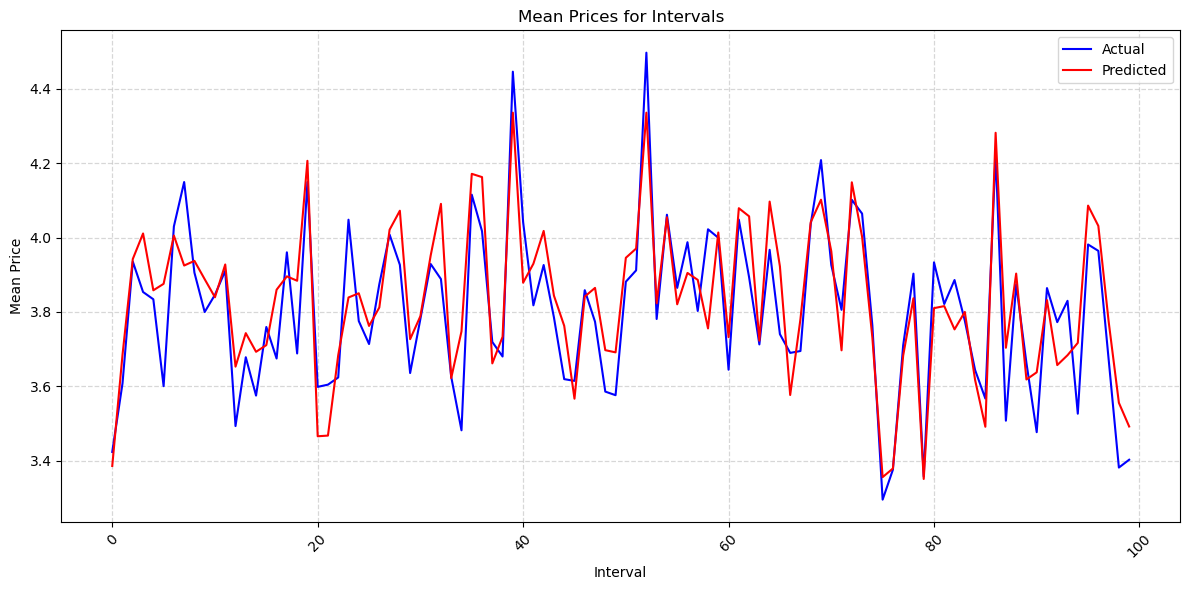

In [53]:
# Define the number of intervals
num_intervals = 100

# Calculate the interval size
interval_size = len(y_val_original) // num_intervals

# Calculate the means for each interval
interval_means_actual = [np.mean(y_val_original[i * interval_size:(i + 1) * interval_size]) for i in range(num_intervals)]
interval_means_pred = [np.mean(y_val_pred_original[i * interval_size:(i + 1) * interval_size]) for i in range(num_intervals)]

# Generate x-axis values for the intervals
x_values = np.arange(num_intervals)

# Plotting the interval means
plt.figure(figsize=(12, 6))
plt.plot(x_values, interval_means_actual, label='Actual', color='blue')
plt.plot(x_values, interval_means_pred, label='Predicted', color='red')
plt.xlabel('Interval')
plt.ylabel('Mean Price')
plt.title('Mean Prices for Intervals')
plt.legend()

# Customize the appearance of the plot
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.9, alpha=0.5)

plt.tight_layout()
plt.show()